In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r'D:\Data_Science\7-Machine_Learning\projects\END-TO-END_projectsML\parkinsons_END_TO_END_ML\NoteBook\Dataset\parkinsons.data')

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df=df.drop('name',axis=1)

In [6]:
df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [7]:
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

<Axes: >

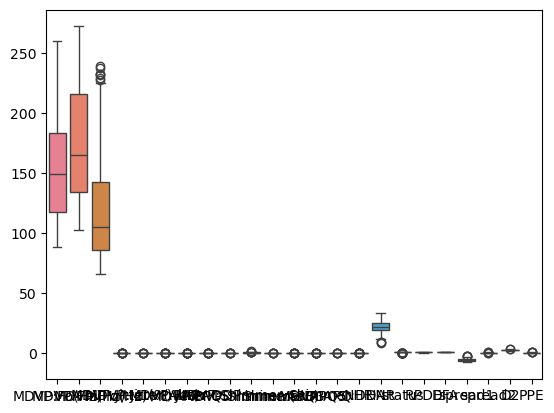

In [14]:
sns.boxplot(df)

In [10]:
def remove_outlier(df,x):
    Q1=df[x].quantile(0.25)
    Q3=df[x].quantile(0.75)
    IQR=Q3-Q1
    Lower_pound=Q1 - 1.5 * IQR
    Upper_Pound=Q3 + 1.5 * IQR
    return (df[x]>=Lower_pound) & (df[x]<=Upper_Pound)

In [13]:
df=df[remove_outlier(df,'MDVP:Fhi(Hz)')]

In [15]:
df.nunique()

MDVP:Fo(Hz)         183
MDVP:Fhi(Hz)        183
MDVP:Flo(Hz)        183
MDVP:Jitter(%)      166
MDVP:Jitter(Abs)     18
MDVP:RAP            150
MDVP:PPQ            158
Jitter:DDP          170
MDVP:Shimmer        178
MDVP:Shimmer(dB)    142
Shimmer:APQ3        172
Shimmer:APQ5        179
MDVP:APQ            178
Shimmer:DDA         177
NHR                 174
HNR                 183
status                2
RPDE                183
DFA                 183
spread1             183
spread2             182
D2                  183
PPE                 183
dtype: int64

In [16]:
df.value_counts().sort_values(ascending=True)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  NHR      HNR     status  RPDE      DFA       spread1    spread2   D2        PPE     
88.333       112.240       84.072        0.00505         0.000060          0.00254   0.00330   0.00763     0.02143       0.197             0.01079       0.01342       0.01892   0.03237      0.01166  21.118  1       0.611137  0.776156  -5.249770  0.391002  2.407313  0.249740    1
91.904       115.871       86.292        0.00540         0.000060          0.00281   0.00336   0.00844     0.02752       0.249             0.01424       0.01641       0.02214   0.04272      0.01141  21.414  1       0.583390  0.792520  -4.960234  0.363566  2.642476  0.275931    1
95.056       120.103       91.226        0.00532         0.000060          0.00268   0.00332   0.00803     0.02838       0.255             0.01441       0.01725     

In [17]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,154.408705,177.414634,118.056519,0.006074,0.000043,0.003236,0.003379,0.009710,0.029764,0.281082,0.015721,0.017994,0.024138,0.047164,0.023295,21.870344,0.754098,0.498713,0.720604,-5.702240,0.224223,2.373700,0.205489
std,42.032231,46.497012,43.777916,0.004603,0.000033,0.002801,0.002634,0.008402,0.018392,0.189398,0.009800,0.011891,0.016889,0.029400,0.037347,4.409621,0.431802,0.106316,0.054879,1.095932,0.083396,0.384144,0.090129
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,133.791500,86.206000,0.003405,0.000020,0.001655,0.001840,0.004970,0.016505,0.147000,0.008430,0.009655,0.013080,0.025300,0.005795,19.198000,1.000000,0.417989,0.678402,-6.476762,0.173420,2.085279,0.135816
50%,148.790000,164.989000,105.007000,0.004900,0.000030,0.002500,0.002670,0.007490,0.023620,0.221000,0.012890,0.014050,0.018520,0.038670,0.011410,21.875000,1.000000,0.497480,0.724045,-5.724056,0.216204,2.359973,0.193918
75%,183.787500,215.797500,142.148500,0.007300,0.000060,0.003835,0.003970,0.011505,0.038310,0.355500,0.020435,0.022735,0.029600,0.061310,0.025070,25.127000,1.000000,0.592669,0.762617,-5.123622,0.274273,2.583133,0.251072
max,260.105000,272.210000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
#MDVP:Fo(Hz)	        التردد الأساسي للصوت 
#MDVP:Fhi(Hz)	        أعلى تردد تم رصده أثناء الكلام (High frequency).
#MDVP:Flo(Hz)	        أقل تردد تم رصده أثناء الكلام (Low frequency).
#MDVP:Jitter(%)	        التذبذب في التردد – بيعبر عن عدم انتظام الذبذبات.
#MDVP:Jitter(Abs)	    التذبذب المطلق في التردد، بوحدة الزمن.
#MDVP:RAP	            Relative Average Perturbation – متوسط تغيّر التردد بين 3 دورات متتالية.
#MDVP:PPQ	            Pitch Period Perturbation Quotient – مشابه لـ RAP لكن على مدى أكبر (5 دورات).
#Jitter:DDP	            Derivative of RAP – متوسط تغير RAP.
#MDVP:Shimmer	        تذبذب شدة الصوت – عدم انتظام في قوة الصوت.
#MDVP:Shimmer(dB)	    نفس التذبذب لكن بوحدة الديسبل.
#Shimmer:APQ3	        Amplitude Perturbation Quotient over 3 cycles – متوسط التغير في الشدة خلال 3 دورات.
#Shimmer:APQ5	        نفس الكلام على مدى 5 دورات.
#MDVP:APQ	            Average Perturbation Quotient – مقياس عام لتذبذب الشدة.
#Shimmer:DDA	        Derivative of APQ3 – مقياس مشتق من تذبذب الشدة.
#NHR	                Noise-to-Harmonics Ratio – نسبة الضوضاء إلى الإشارة في الصوت. كلما زادت، الصوت فيه ضوضاء أكتر.
#HNR	                Harmonics-to-Noise Ratio – العكس: نسبة الإشارة إلى الضوضاء.
#RPDE	                Recurrence Period Density Entropy – مقياس تعقيد نمط الصوت عبر الزمن. كلما زاد، يعكس اضطراب أكبر.
#DFA	                Detrended Fluctuation Analysis – مقياس لتحليل التقلبات في الإشارات الزمنية.
#spread1               	يقيس التباعد (الانحراف) في التردد من خط مستقيم مرجعي. يتأثر بارتجاف الصوت.
#spread2             	مقياس تباعد إضافي – بيقيس العلاقة بين المعلمات الترددية المختلفة.
#D2	Dimension estimate – مقياس يعبر عن الفوضوية (chaotic behavior) في الصوت. أعلى في مرضى باركنسون.
#PPE	

<Axes: xlabel='status', ylabel='count'>

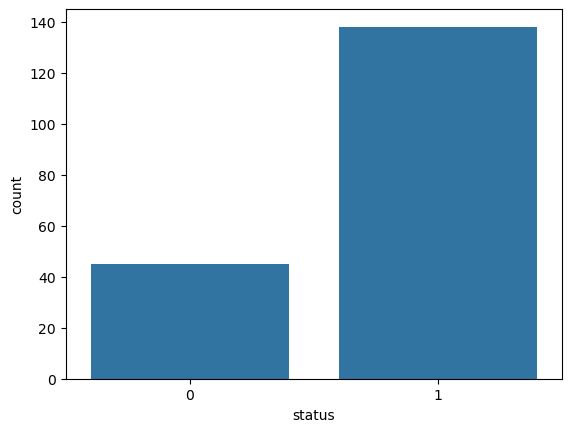

In [ ]:
#NUM OF Infected and uninfected
sns.countplot(x='status', data=df)
plt.show()

<Axes: xlabel='HNR', ylabel='Count'>

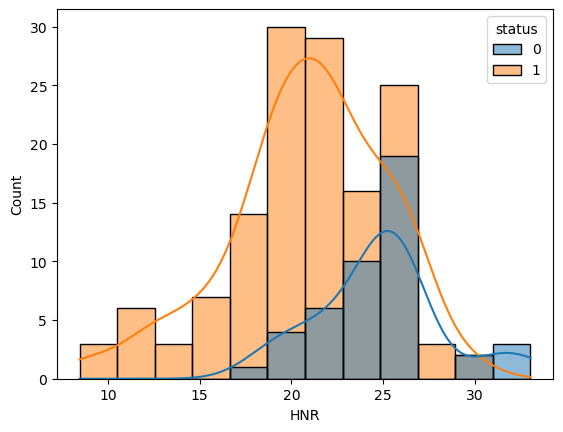

In [29]:
#Do infected people have less HNR than healthy people or not?

sns.histplot(data=df, x='HNR', kde=True, hue='status')

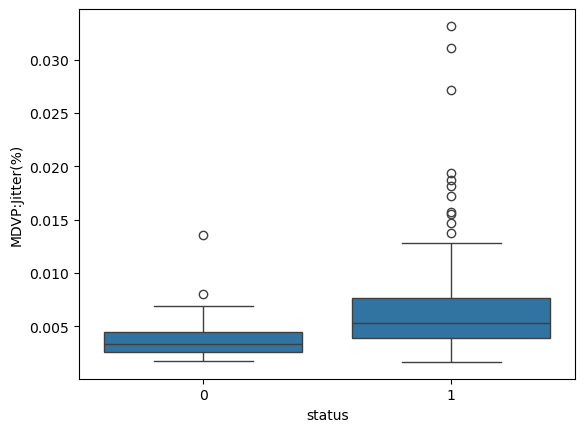

In [31]:
#compare value between infected and others
sns.boxplot(x='status', y='MDVP:Jitter(%)', data=df)
plt.show()

<Axes: >

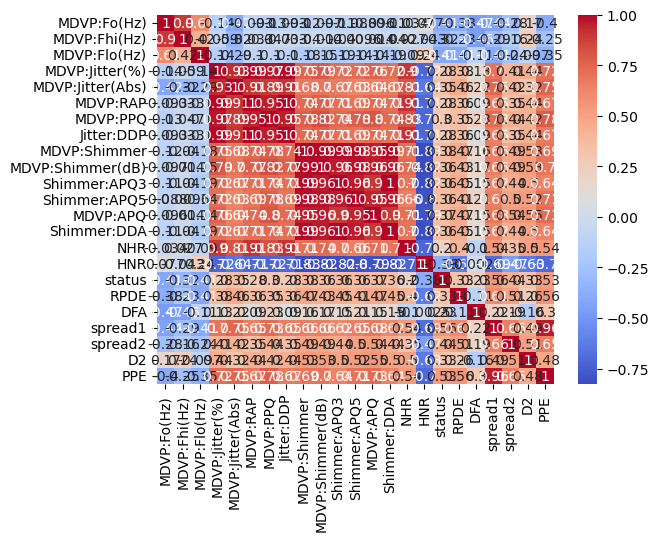

In [32]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

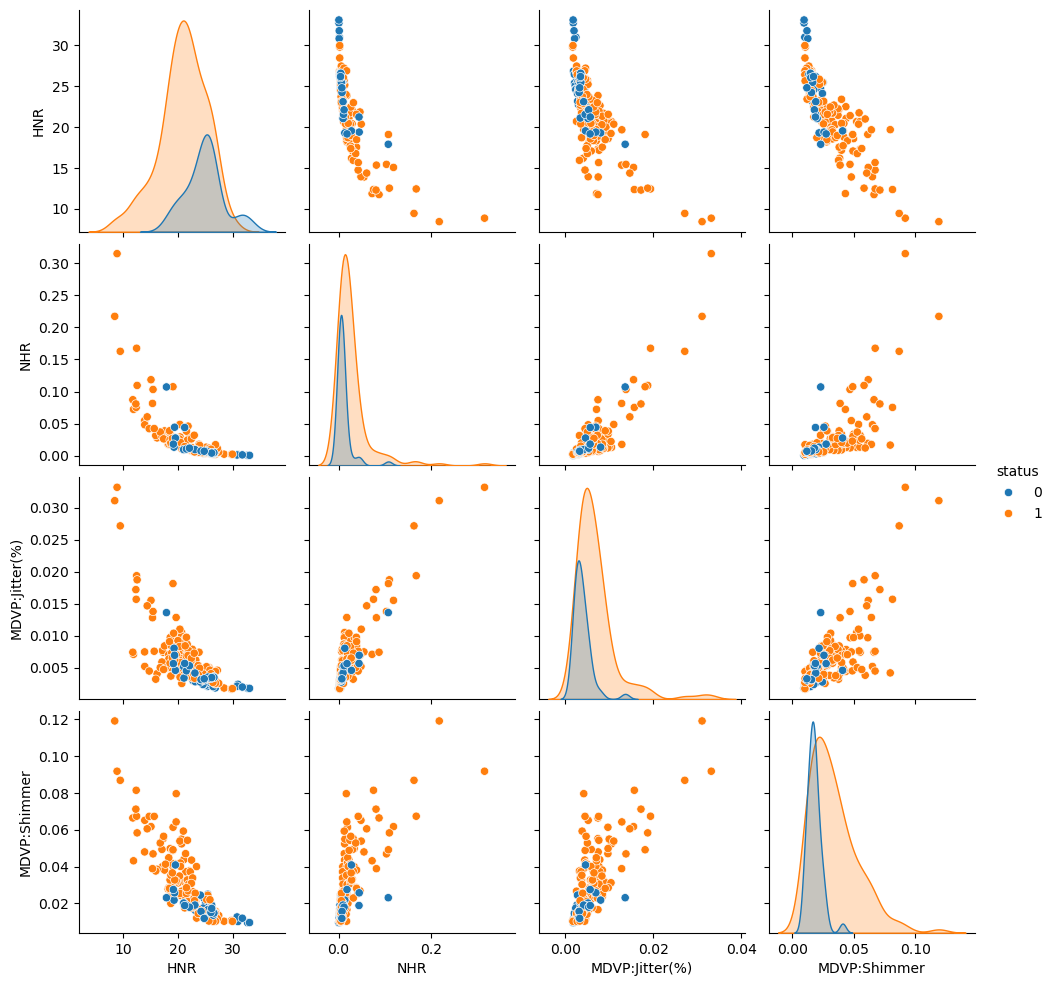

In [33]:
selected_cols = ['HNR', 'NHR', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'status']
sns.pairplot(df[selected_cols], hue='status')

<Axes: xlabel='status', ylabel='RPDE'>

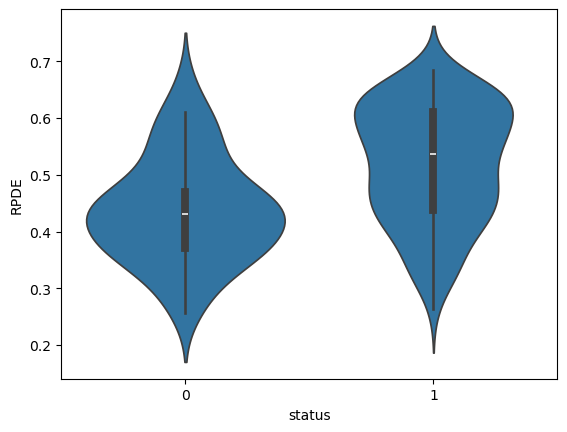

In [ ]:
sns.violinplot(x='status', y='RPDE', data=df)
plt.show()

In [35]:
df.to_csv('parkinsons_after_edit.csv',index=False)